In [1]:
import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'numpy'

# Load datasets

## Unzip data

In [ ]:
import zipfile

train_zip_path = "train.csv.zip"
test_zip_path = "test.csv.zip"

train_path = "train"
test_path = "test"

with zipfile.ZipFile(train_zip_path, 'r') as zip_ref:
    zip_ref.extractall(train_path)
    
with zipfile.ZipFile(test_zip_path, 'r') as zip_ref:
    zip_ref.extractall(test_path)
    
train_path

'train'

## Load data

In [ ]:
train_csv_path = os.path.join(train_path, "train.csv")
test_csv_path = os.path.join(test_path, "test.csv")

In [ ]:
train_df = pd.read_csv(train_csv_path)
train_df.head(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


In [ ]:
test_df = pd.read_csv(test_csv_path)
test_df.head(10)

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
5,0001ea8717f6de06,Thank you for understanding. I think very high...
6,00024115d4cbde0f,Please do not add nonsense to Wikipedia. Such ...
7,000247e83dcc1211,:Dear god this site is horrible.
8,00025358d4737918,""" \n Only a fool can believe in such numbers. ..."
9,00026d1092fe71cc,== Double Redirects == \n\n When fixing double...


In [ ]:
labels = train_df.columns[2:].to_numpy()
labels

array(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'], dtype=object)

# Split training dataset into training and validation

Currently we have a training set and a test set. The training set has its corresponding labels, while the test set doesn't.

To make sure that our model doesn't overfit, let's split our training set into two parts: a training set (which will be used to train the model) and a validation set (which will be used to make sure the model doesn't overfit).

In [ ]:
train_sentences = train_df["comment_text"]
train_labels = train_df.iloc[:, 2:]

print(f"Train sentences: {train_sentences.shape}")
print(f"Train labels: {train_labels.shape}")

Train sentences: (159571,)
Train labels: (159571, 6)


In [ ]:
from sklearn.model_selection import train_test_split

train_pct = 0.8

train_sentences, val_sentences, train_labels, val_labels = train_test_split(
    train_sentences,
    train_labels,
    train_size=0.8
)

print(f"Train sentences: {train_sentences.shape}")
print(f"Train labels: {train_labels.shape}")
print(f"Validation sentences: {val_sentences.shape}")
print(f"Validation labels: {val_labels.shape}")

Train sentences: (127656,)
Train labels: (127656, 6)
Validation sentences: (31915,)
Validation labels: (31915, 6)


# Text Preprocessing

We need to remove some punctuation marks and special charaters, so our text is clean and crisp!

In [ ]:
# gunky text, bleugh
train_sentences

24959     fanny does as well \n\n                       ...
124566    what the hell is your problem?! \n\nwhy the fu...
76425     Brother Cream \n\nHello Yunshui: I noticed tha...
95134     No thank you, I have better ways to spend my t...
6360      "\n\nPlease stop. If you continue to blank pag...
                                ...                        
98083     If Roger Stritmatter gets his own page, I'll d...
1885                 I'm working on it. Thanks for the tip.
57540         Bla bla bla. Where are links to proof? Where?
95669     "\nDo you think you are the ""owner"" of this ...
86111          do you ever feel proud of blocking persons ?
Name: comment_text, Length: 127656, dtype: object

In [ ]:
import string

def remove_punctuation(text):
    return text.translate(str.maketrans("", "", string.punctuation))

def remove_special_chars(text):
    return text.replace("\n", " ").replace("\t", " ").strip()

def normalize_spacing(text):
    return " ".join(text.split())

def process_text(text):
    text = remove_punctuation(text)
    text = remove_special_chars(text)
    text = normalize_spacing(text)
    return text

In [ ]:
# apply preprocessing
train_sentences = train_sentences.map(process_text)
val_sentences = val_sentences.map(process_text)

NameError: name 'train_sentences' is not defined

In [ ]:
# before we continue, let's get some info about the word count for the sentences
print("Word count statistics:\n")
train_sentences.apply(len).describe()

Word count statistics:



count    127656.000000
mean        372.504583
std         560.487456
min           3.000000
25%          89.000000
50%         193.000000
75%         413.000000
max        5000.000000
Name: comment_text, dtype: float64

In [ ]:
# convert Pandas series to NumPy arrays
train_sentences = train_sentences.to_numpy()
train_labels = train_labels.to_numpy()
val_sentences = val_sentences.to_numpy()
val_labels = val_labels.to_numpy()

In [ ]:
# much better!
train_sentences

array(['fanny does as well poo',
       'what the hell is your problem why the fuck are you removing my edits on aricles and talk pages you want me to stay calm stop removing my edits',
       'Brother Cream Hello Yunshui I noticed that you deleted Brother Cream because it duplicates an existing topic Tsim Tung Brother Cream First of all this is fine The deleted article had several Chineselanguage sources in it that would be useful in the existent article Therefore Im requesting that you please WPREFUND the deleted article to talk',
       ..., 'Bla bla bla Where are links to proof Where',
       'Do you think you are the owner of this article Then you are inviting and justifying a photowar Replace the Eyüp photo with a high noon photo of either Sultanahmet mosque or Büyük Mecidiye of Ortaköy Place the remaining one of the two photos in the collage instead of that Alhambra that does not belong here Please',
       'do you ever feel proud of blocking persons'], dtype=object)

# Tokenization preparation

**In fact, TensorFlow JS, which is used to load the model on the frontend, does not support the TextVectorization layer. Instead, we'll have to use the TensorFlow Tokenizer.**

In [16]:
# let's figure out how many unique words there are in our vocabulary

vocab = set()
for sentence in train_sentences:
    for word in sentence.split():
        vocab.add(word)
        
vocab_size = len(vocab)
print(f"Vocab size: {vocab_size}")

Vocab size: 259549


In [17]:
vocab_size=100000

In [18]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(train_sentences)

In [19]:
# get limited vocabulary from tokenizer word index

import json

vocab = {}
for word, index in tokenizer.word_index.items():
    if index <= vocab_size:
        vocab[word] = index
        
print(len(vocab))

with open("tokenizer_dictionary.json", "w") as file:
    json.dump(vocab, file)

100000


In [20]:
# convert sentences to integer sequences
train_sequences = tokenizer.texts_to_sequences(train_sentences)
val_sequences = tokenizer.texts_to_sequences(val_sentences)

# pad integer sequences into fixed length
max_length = 300
padding_type = "post"
trunc_type = "post"

train_sequences = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
val_sequences = pad_sequences(val_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

print(f"Train sentences (vectorized): {train_sequences.shape}")
print(f"Validation sentences (vectorized): {val_sequences.shape}")

Train sentences (vectorized): (127656, 300)
Validation sentences (vectorized): (31915, 300)


# Create model

In [21]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding, LSTM, Dense, TextVectorization, Input

In [22]:
# our model will first convert the vectorized sentences into embeddings (fixed-size vectors)
# the model will automatically learn the best embeddings (which are really the weights)
# but we can set the dimension for the embeddings ourselves
embedding_dim = 200

In [23]:
# define and compile model

model = tf.keras.Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    LSTM(16, activation="tanh"),
    Dense(6, activation="sigmoid"), # we are predicting for 6 classes
])

model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 200)          20000000  
                                                                 
 lstm (LSTM)                 (None, 16)                13888     
                                                                 
 dense (Dense)               (None, 6)                 102       
                                                                 
Total params: 20,013,990
Trainable params: 20,013,990
Non-trainable params: 0
_________________________________________________________________


In [25]:
# set model training parameters

epochs = 5 # if you want to improve performance, try increasing the number of training epochs
batch_size = 64
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=3),
]

In [26]:
model.evaluate(val_sequences, val_labels)

998/998 [==============================] - 20s 19ms/step - loss: 0.7057 - accuracy: 0.0027


[0.7056665420532227, 0.0026946577709168196]

In [27]:
# train model

model.fit(
    train_sequences,
    train_labels,
    validation_data=(val_sequences, val_labels),
    epochs=epochs,
    batch_size=batch_size,
    callbacks=callbacks,
)

Epoch 1/5
1995/1995 [==============================] - 434s 216ms/step - loss: 0.1489 - accuracy: 0.9436 - val_loss: 0.1397 - val_accuracy: 0.9931
Epoch 2/5
1995/1995 [==============================] - 403s 202ms/step - loss: 0.1404 - accuracy: 0.9899 - val_loss: 0.1396 - val_accuracy: 0.9934
Epoch 3/5
1995/1995 [==============================] - 322s 161ms/step - loss: 0.1389 - accuracy: 0.9893 - val_loss: 0.1141 - val_accuracy: 0.9935
Epoch 4/5
1995/1995 [==============================] - 254s 127ms/step - loss: 0.1338 - accuracy: 0.9943 - val_loss: 0.1082 - val_accuracy: 0.9935
Epoch 5/5
1995/1995 [==============================] - 252s 126ms/step - loss: 0.1123 - accuracy: 0.9935 - val_loss: 0.1259 - val_accuracy: 0.9935


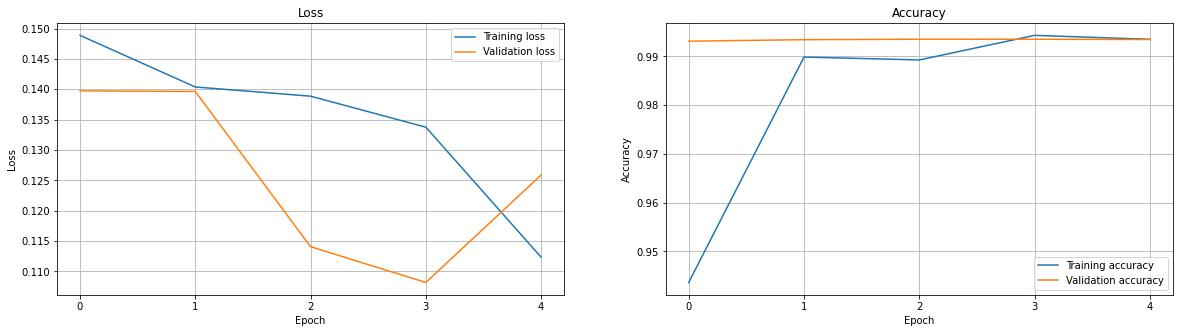

In [28]:
hist = model.history.history

plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
plt.title("Loss")
plt.plot(hist["loss"], label="Training loss")
plt.plot(hist["val_loss"], label="Validation loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.xticks(range(len(hist["loss"])))
plt.legend(loc="upper right")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.title("Accuracy")
plt.plot(hist["accuracy"], label="Training accuracy")
plt.plot(hist["val_accuracy"], label="Validation accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.xticks(range(len(hist["accuracy"])))
plt.legend(loc="lower right")
plt.grid(True)

plt.show()

# Predictions

In [29]:
def predict(sentence):
    # convert sentence to sequence
    sequences = tokenizer.texts_to_sequences([sentence])
    padded_sequences = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
    
    # get predictions for toxicity
    predictions = model.predict(padded_sequences)[0]
    
    return list(zip(labels, predictions))

In [30]:
predict("I hate you")

1/1 [==============================] - 0s 319ms/step


[('toxic', 0.08578369),
 ('severe_toxic', 0.0038679282),
 ('obscene', 0.04122875),
 ('threat', 0.0015137994),
 ('insult', 0.03839737),
 ('identity_hate', 0.005852607)]

In [31]:
predict("You should kill yourself right now")

1/1 [==============================] - 0s 23ms/step


[('toxic', 0.08578367),
 ('severe_toxic', 0.0038679282),
 ('obscene', 0.04122875),
 ('threat', 0.0015137994),
 ('insult', 0.038397383),
 ('identity_hate', 0.005852607)]

In [32]:
predict("I love you")

1/1 [==============================] - 0s 19ms/step


[('toxic', 0.08578369),
 ('severe_toxic', 0.0038679282),
 ('obscene', 0.04122875),
 ('threat', 0.0015138001),
 ('insult', 0.03839737),
 ('identity_hate', 0.005852607)]

# Export model

In [33]:
loss, accuracy = model.evaluate(val_sequences, val_labels)
print(f"Accuracy on validation sentences: {accuracy}")

998/998 [==============================] - 13s 13ms/step - loss: 0.1259 - accuracy: 0.9935
Accuracy on validation sentences: 0.9934513568878174


In [34]:
# save model

save_dir = "comment_toxicity_classifier.h5"
model.save(save_dir)